# Introducción
Esta práctica se basa en la realización de un problema de optimización dentro del ámbito estudiantil.

El problema realizado se basa en la elección de un determinado número de cursos aprovechando al máximo (de una forma óptima) el tiempo y la cantidad de estos.

## Horario de cursos
Hay n cursos diferentes, están numerados del 0 al (n-1). Cada curso tiene un tiempo de clase continuo determinado T (tiempo del curso) y una fecha de cierre D días. Se continuará estudiando un curso durante T días hasta que se complete el día D, y comenzará el día 1.


Dado n cursos representados por (T, D) pares. El objetivo es encontrar la secuencia de cursos que puede cursar como máximo tanto el número de cursos (objetivo con más prioridad) como el tiempo invertido en los cursos (los T días acumulados desde día 1).

## Ejemplo
Dado la siguiente lista de clases: [(100, 200), (200, 1300), (1000, 1250), (2000, 3200)]

Una solución óptima es: [(100, 200), (1000, 1250), (200, 1300)]

### Explicación

Hay 4 cursos en total, pero se puede tomar hasta 3 cursos:

- En primer lugar, para realizar el primer curso, se tomarán 100 días, se completará exactamente el día 100 y se prepara para el siguiente curso el día 101.

- En segundo lugar, se tomará 1000 días para empezar el tercer curso, por lo que se terminará el día 1100 y se empieza a preparar para el siguiente curso el día 1101.

- En tercer lugar, pasarám 200 días para tomar el segundo curso, por lo que se terminará el día 1300.

- Y por último, el cuarto curso no se puede tomar ahora porque lo terminará el día 3300, que es más allá de la fecha de cierre.

## Código
Para la implementación del código hemos acudido la librería DEAP de Python.

In [1]:
from deap import creator
from deap import base
from deap import tools
import array

creator.create("Fitness", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", array.array, typecode='i', fitness=creator.Fitness)

Para representar la codificación de un individuo usamos un array para guardar el orden de las posiciones que ocupa cada curso en la lista de cursos dado como input. Cada atributo fitness de cada individuo está formado por dos valores, primero por el número de cursos cursados, y el segundo indica el tiempo en días que han cursado en total. Tanto el primero como el segundo valor son problemas de maximización.

Creamos una lista de cursos con longitud NBR_COURSES de forma aleatoria tal que 1 < T, D < 1000 como input del problema a resolver.

In [2]:
import random
random.seed(100) # mantener la misma semilla para obtener simpre los mismos resultados

NBR_COURSES = 50 # número de cursos a generar
courses = []
for _ in range(NBR_COURSES):
    T = random.randint(1, 9999)
    D = random.randint(T+1, 10000)
    courses.append((T, D))
    
#courses = [(100, 200), (200, 1300), (1000, 1250), (2000, 3200)]
#courses = [(5900, 6001), (100, 101), (100,201), (100,301), (100,401), (100,501), (100,601)]

En este punto, definimos como inicializar nuestra población e individuos. Los individuos se crean alternando la posición de la lista de índices de los cursos, y la población consiste en una simple lista de individuos.

In [3]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(courses)), len(courses))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Ahora determinamos como calcular el fitness dado un individuo, el paso consiste que desde día 1 vamos sumando en orden de la lista el tiempo T y comprobamos por cada curso si los días acumulados se encuentra mayor que D días del mismo curso, en caso positivo se pararía de recorrer el individuo ya que los posteriores tampoco lo cumplirían. 

Finalmente devuelve el número de cursos y los días cursados en total como fitness.

In [4]:
def evalHorarioCursos(individual):
    day = 1
    n_courses = 0
    for course in individual:
        temp_day = day + courses[course][0]
        if temp_day > courses[course][1]:
            break
        day = temp_day
        n_courses += 1
    return n_courses, day

### Selección de los operadores del algoritmo genético.
- Operador de cruce por Partialy Matched (consiste en un cruce parcial de los índices).
- Operador de mutación por Shuffle Indexes con una probabilidad de 5% en cambiar de posición por cada índice.
- Operador de selección por Tournament con un tamaño de torneo 3.
- La función de fitness que hemos definido anteriormente.

In [5]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalHorarioCursos)

Inicializamos una población y ejecutamos el algoritmo genético con los siguientes parámetros.
- Número de generación: 50
- Probabilidad de cruce: 70%
- Probabilidad de mutación: 20%
- Tamaño de la populación: 300

In [6]:
import numpy
from deap import algorithms

def main():
    # random.seed()
    
    NGEN = 50
    CXPB = 0.7
    MUTPB = 0.2
    MU = 300

    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    _, log = algorithms.eaSimple(pop, toolbox, CXPB, MUTPB, NGEN, stats=stats, halloffame=hof)
    
    return pop, stats, hof, log

pop, stats, hof, log = main()

gen	nevals	avg 	std     	min	max
0  	300   	1.24	0.499066	1  	3  
1  	224   	1.41667	0.596983	1  	4  
2  	219   	1.71667	0.640095	1  	4  
3  	250   	1.87333	0.723848	1  	4  
4  	228   	2.04   	0.80316 	1  	4  
5  	232   	2.30667	0.832239	1  	4  
6  	215   	2.53333	0.924962	1  	5  
7  	219   	2.88333	1.01146 	1  	5  
8  	234   	3.14   	0.996862	1  	5  
9  	230   	3.45   	1.00374 	1  	5  
10 	225   	3.64667	1.05601 	1  	5  
11 	229   	3.93   	1.05124 	1  	6  
12 	233   	4.08333	1.07845 	1  	6  
13 	217   	4.36667	0.930352	2  	6  
14 	208   	4.39667	1.0389  	1  	6  
15 	217   	4.29   	1.25136 	1  	7  
16 	223   	4.54   	1.08093 	2  	7  
17 	229   	4.53667	1.24445 	1  	7  
18 	221   	4.60667	1.28009 	1  	7  
19 	225   	4.76667	1.26711 	1  	7  
20 	222   	5.20667	1.16216 	1  	7  
21 	243   	5.25   	1.38353 	1  	7  
22 	223   	5.61   	1.38488 	1  	7  
23 	243   	5.81333	1.54655 	1  	7  
24 	228   	6.22   	1.57848 	1  	7  
25 	229   	6.20667	1.6585  	1  	7  
26 	234   	6.00667	1.94935 	1  	7 

En este momento, podemos observar como el fitness del mejor individuo de la población va mejorando cada generación en la gráfica.

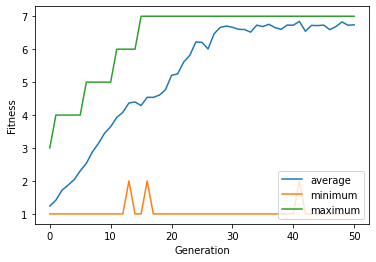

In [7]:
import matplotlib.pyplot as plt

gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg,  label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")

plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend(loc="lower right")

plt.show()

Dada la siguiente lista de cursos formado por pares de (T, D) como input del problema:

In [8]:
courses

[(2387, 6152),
 (7454, 8170),
 (6440, 9439),
 (5731, 9283),
 (8305, 9944),
 (1802, 3790),
 (1314, 8785),
 (4316, 4709),
 (3351, 6099),
 (3764, 6299),
 (3341, 4803),
 (2308, 3853),
 (5686, 8718),
 (6713, 7577),
 (6604, 8493),
 (9100, 9383),
 (6146, 6804),
 (2034, 3514),
 (93, 9969),
 (6481, 7086),
 (9276, 9443),
 (3157, 4526),
 (429, 4316),
 (7344, 9957),
 (6352, 6871),
 (9076, 9852),
 (860, 4909),
 (8309, 9772),
 (4749, 9586),
 (5550, 9877),
 (5625, 8599),
 (7923, 9569),
 (1015, 2676),
 (4914, 8474),
 (4138, 6103),
 (7167, 9271),
 (8086, 9933),
 (9547, 9678),
 (2412, 2889),
 (9591, 9759),
 (2699, 3147),
 (4509, 5501),
 (832, 4423),
 (5077, 9374),
 (3547, 8879),
 (9310, 9676),
 (5469, 9203),
 (206, 2075),
 (7791, 8581),
 (8607, 8851)]

Obtenemos como output la siguiente lista de índices como una posible solución del problema:

In [9]:
hof[0][:int(hof[0].fitness.values[0])]


array('i', [47, 26, 22, 18, 6, 0, 44])

Con el siguiente fitness:

In [10]:
hof[0].fitness.values

(7.0, 8837.0)

Finalmente, y más en concreto, obtenemos la siguiente lista de cursos con los pares (T, D) como solución (con el formato que pide el problema):

In [11]:
[courses[i] for i in hof[0][:int(hof[0].fitness.values[0])]]

[(206, 2075),
 (860, 4909),
 (429, 4316),
 (93, 9969),
 (1314, 8785),
 (2387, 6152),
 (3547, 8879)]